In [8]:
# This is just the csv in table form.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

olympics = pd.read_csv('new_olympics.csv')

In [9]:
# This is just a helper function for the make_histrogram.
def whichGame(game):
    chartTitle = ''
    gameType = olympics.CombinedTotal
    
    # This bit will determine which game to use.
    if(game == 'all'):
        chartTitle = 'Total Medal Count for All Olympic Games\n' 
        gameType = olympics.CombinedTotal
    elif(game == 'summer'):
        chartTitle = 'Total Medal Count for All Summer Olympic Games\n'
        gameType = olympics.sTotal
    else:
        chartTitle = 'Total Medal Count for All Winter Olympic Games\n'
        gameType = olympics.wTotal
        
    # Just some returns.
    return chartTitle, gameType

In [10]:
# This is just a helper function for the make_pie.
def whichGamePie(game):
    chartTitle = ''
    pieWhere = olympics.iloc[:10].CombinedTotal
    nations = olympics.iloc[:10].Nation
    
    # This bit will determine which game to use.
    if(game == 'all'):
        chartTitle = 'Total Medal Count for All Olympic Games\n' 
        
        olympics.sort_values(by=['CombinedTotal'], ascending=False, inplace=True)
        pieWhere = olympics.iloc[:10].CombinedTotal
        nations = olympics.iloc[:10].Nation
    elif(game == 'summer'):
        chartTitle = 'Total Medal Count for All Summer Olympic Games\n'
        
        olympics.sort_values(by=['sTotal'], ascending=False, inplace=True)
        pieWhere = olympics.iloc[:10].sTotal
        nations = olympics.iloc[:10].Nation
    else:
        chartTitle = 'Total Medal Count for All Winter Olympic Games\n'
        
        olympics.sort_values(by=['wTotal'], ascending=False, inplace=True)
        pieWhere = olympics.iloc[:10].wTotal
        nations = olympics.iloc[:10].Nation
        
    # Just some returns.
    return chartTitle, pieWhere, nations

In [4]:
# I made a histogram function so I can call it three times, one for each type of total.
def make_histogram(game):
    histTitle, column = whichGame(game)

    # These two lines are all that is really needed to make the histogram.
    fig, ax = plt.subplots(tight_layout=True, figsize=(16,8))
    n, bins, patches = plt.hist(column, bins=32)

    # This bit will change the bin labels to a value range.
    xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
    xticks_labels = [ "{:.0f}\n-\n{:.0f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
    plt.xticks(xticks, labels=xticks_labels, fontsize=10)
    
    # This bit is to add the number of countries that are held in each bin on top of the bar.
    for idx, value in enumerate(n):
        if value > 0:
            plt.text(xticks[idx], value+5, int(value), ha='center', fontsize=16)

    # This bit removes all the borders and lines in the histogram.
    ax.tick_params(axis='x', which='both',length=0)
    plt.yticks([])
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # This bit will add a title and label the x/y axis.
    plt.title(histTitle, fontsize = 32)
    plt.xlabel('\nNumber of Medals Won', fontsize=24)
    plt.ylabel('Number of Countries', fontsize=24)

In [11]:
# I made a pie chart function so I can call it three times, one for each type of total.
def make_pie(game):
    pieTitle, pieWhere, nations = whichGamePie(game)
    
    fig, ax = plt.subplots(tight_layout=True, figsize=(16,8))
    plt.pie(pieWhere, labels=nations, startangle=90)
    
    # This bit will add a title.
    plt.title(pieTitle, fontsize = 32)


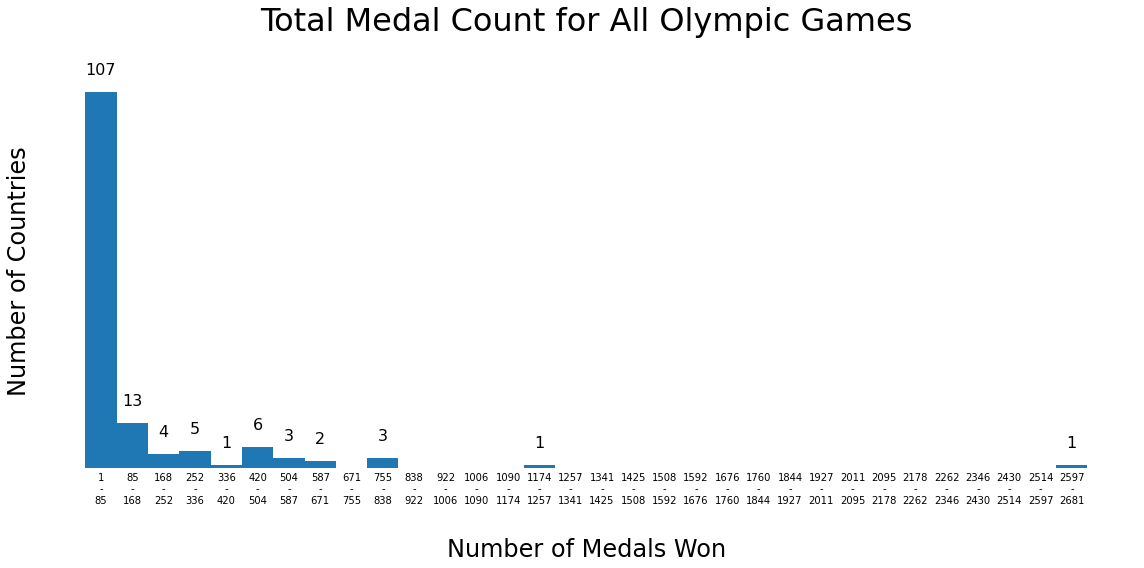

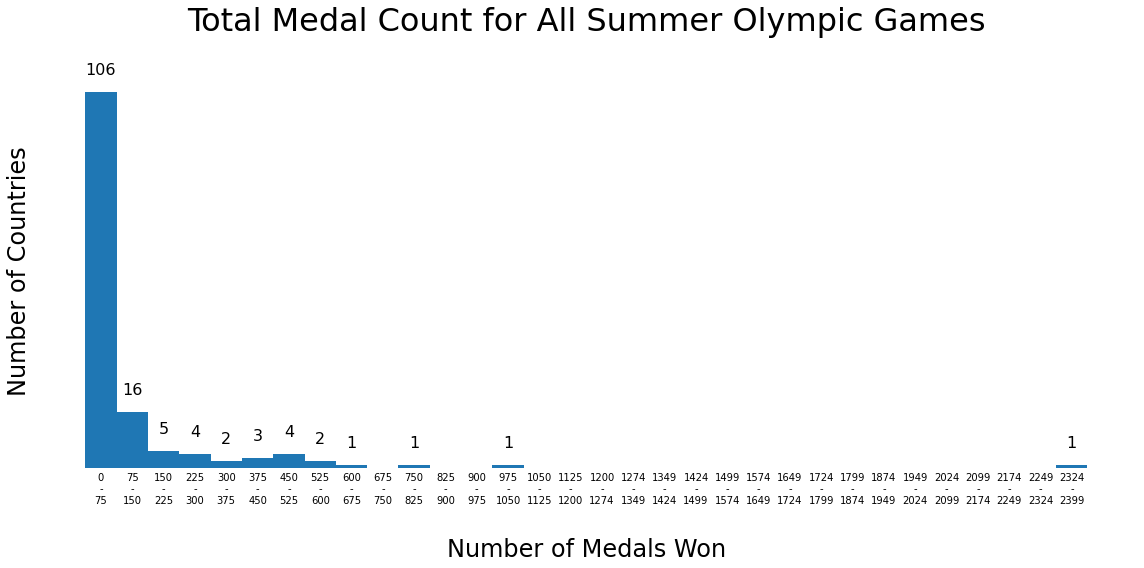

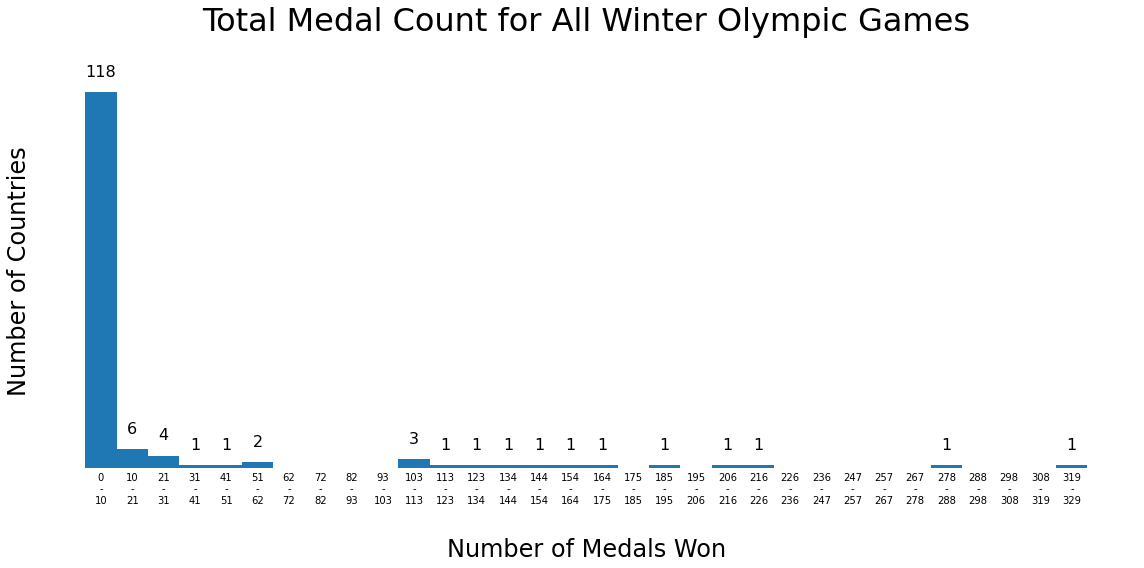

In [6]:
# Let's make histograms for total medal count of olympic games. One each for summer, winter, and all games.
make_histogram('all')
make_histogram('summer')
make_histogram('winter')

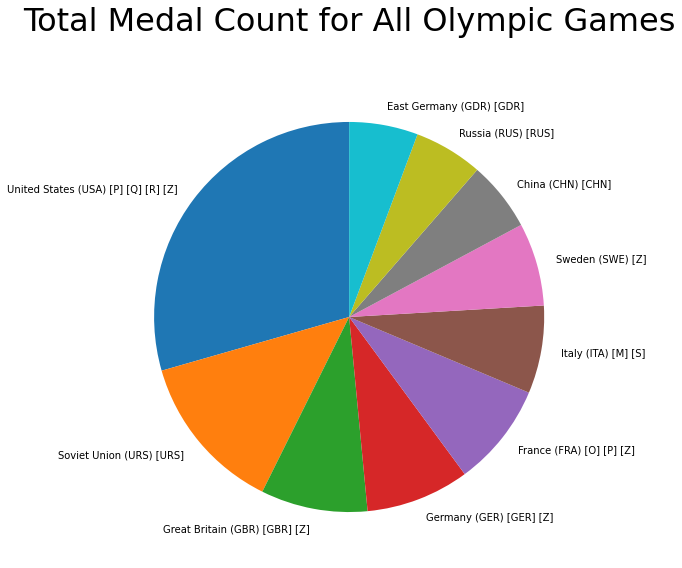

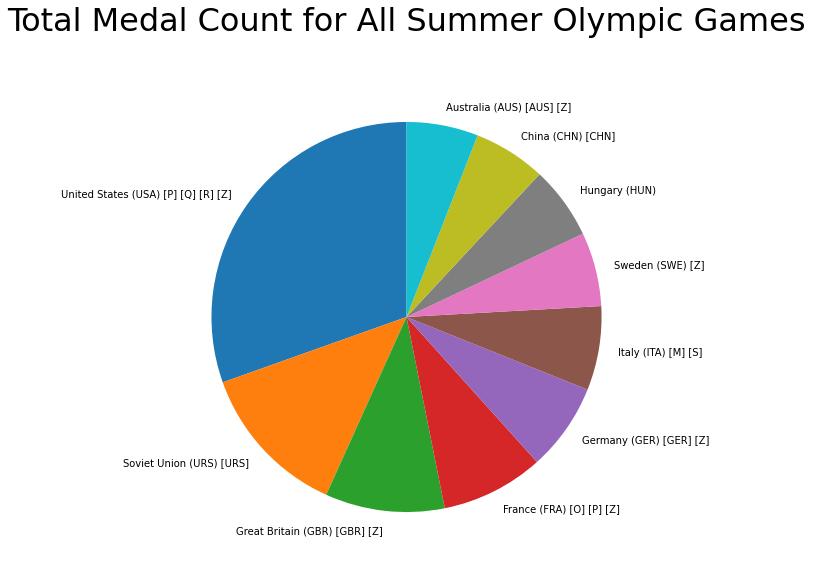

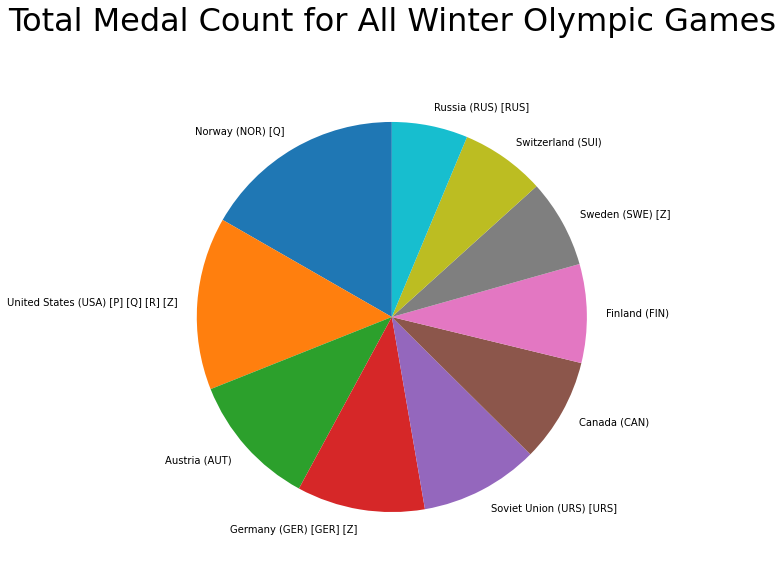

In [7]:
# Let's make histograms for total medal count of olympic games. One each for summer, winter, and all games.
make_pie('all')
make_pie('summer')
make_pie('winter')